#Model Quality and Improvements

##Problem Statement

As a data professional working for a pharmaceutical company, you need to develop a model that predicts whether a patient will be diagnosed with diabetes. The model needs to have an accuracy score greater than 0.85.

##Data Importation

In [2]:
# Import libraries 
import pandas as pd

# Dataset URL: https://bit.ly/DiabetesDS

diabetic_patients_df = pd.read_csv("https://bit.ly/DiabetesDS")

diabetic_patients_df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##Data Exploration

In [3]:
# Check the dataset size
diabetic_patients_df.shape

(768, 9)

In [4]:
# Check for NaN values 
diabetic_patients_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Describe the Data
diabetic_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Summary stats for the data set
diabetic_patients_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#see the amount of data on each target
diabetic_patients_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
# Expressing the outcome as a percentage
print('1. The percentage of patients without diabetes are ' 
      + str(round(((diabetic_patients_df["Outcome"].isin([0]).sum())/diabetic_patients_df.shape[0])*100,2)) + ' %')
print('2. The percentage of patients with diabetes are ' 
      + str(round(((diabetic_patients_df["Outcome"].isin([1]).sum())/diabetic_patients_df.shape[0])*100,2)) + ' %')

1. The percentage of patients without diabetes are 65.1 %
2. The percentage of patients with diabetes are 34.9 %


##Data Cleaning

In [9]:
# check column names
diabetic_patients_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# Standardize a dataset by stripping leading and trailing spaces and setting all columns to lower
diabetic_patients_df.columns = diabetic_patients_df.columns.str.strip().str.lower()
diabetic_patients_df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [11]:
# Check for missing values
diabetic_patients_df.isna().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

There are no missing values in the data set

In [12]:
# Check for duplicates
diabetic_patients_df.duplicated().sum()

0

There are no duplicates in the data

##Data Preparation

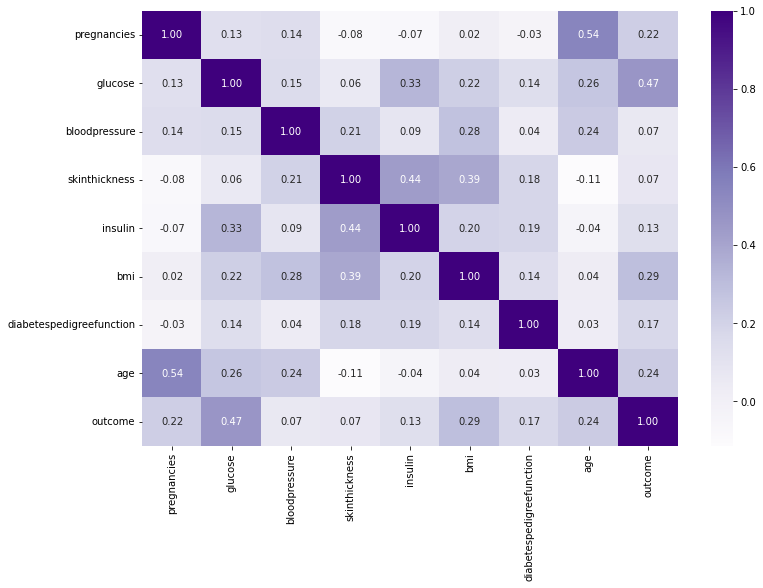

In [18]:
# check correlation of features and target
import matplotlib.pyplot as plt
import seaborn as sns

features = diabetic_patients_df.columns
corr_= diabetic_patients_df[features].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "Purples");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

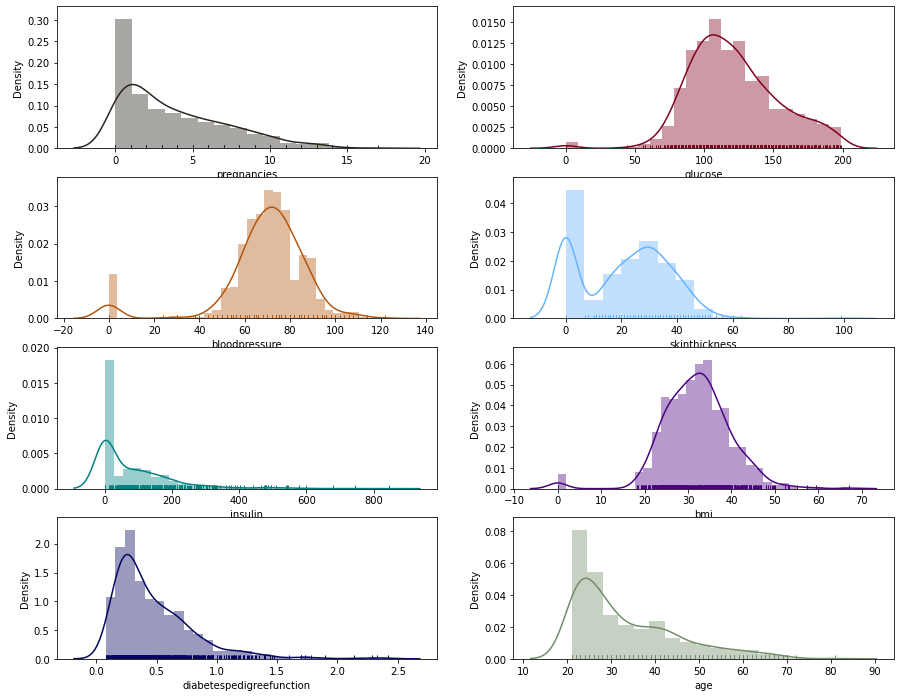

In [32]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(diabetic_patients_df['pregnancies'],rug=True,color='#28231D',ax=axs[0])
sns.distplot(diabetic_patients_df['glucose'],rug=True,color='#800020',ax=axs[1])
sns.distplot(diabetic_patients_df['bloodpressure'],rug=True,color='#B2560D',ax=axs[2])
sns.distplot(diabetic_patients_df['skinthickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(diabetic_patients_df['insulin'],rug=True,color='#008080',ax=axs[4])
sns.distplot(diabetic_patients_df['bmi'],color='#4B0082',rug=True,ax=axs[5])
sns.distplot(diabetic_patients_df['diabetespedigreefunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(diabetic_patients_df['age'],rug=True,color='#728C69',ax=axs[7])
plt.show()

-Blood pressure is zero in some subjects-not in range of normal blood pressure levels in humans

-there are some bmi values which are also zero

-many skinthickness values of zero

bmi

skinthickness

glucose

dropping zeros leaves a very small dataset to work with

In [34]:
# converting zeros to null for the purposes of imputation
import numpy as np
colsToFix = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']
diabetic_patients_df[colsToFix] = diabetic_patients_df[colsToFix].replace(0, np.NaN)

- If skewness is less than -1 or greater than 1, the distribution is highly skewed.<br>
    - If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.<br>
    - If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.<br>

  For our data, if skewness value is between -0.5 and 0.5, I'll use the mean to impute missing values, else, I will use median.

In [35]:
# Note: colsToFix was defined earlier as a list --> ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

diabetic_patients_df[colsToFix].skew()

glucose          0.530989
bloodpressure    0.134153
skinthickness    0.690619
insulin          2.166464
bmi              0.593970
dtype: float64

In [36]:
diabetic_patients_df['glucose'].fillna(diabetic_patients_df['glucose'].median(), inplace = True)
diabetic_patients_df['skinthickness'].fillna(diabetic_patients_df['skinthickness'].median(), inplace = True)
diabetic_patients_df['insulin'].fillna(diabetic_patients_df['insulin'].median(), inplace = True)
diabetic_patients_df['bmi'].fillna(diabetic_patients_df['bmi'].median(), inplace = True)

diabetic_patients_df['bloodpressure'].fillna(diabetic_patients_df['bloodpressure'].mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

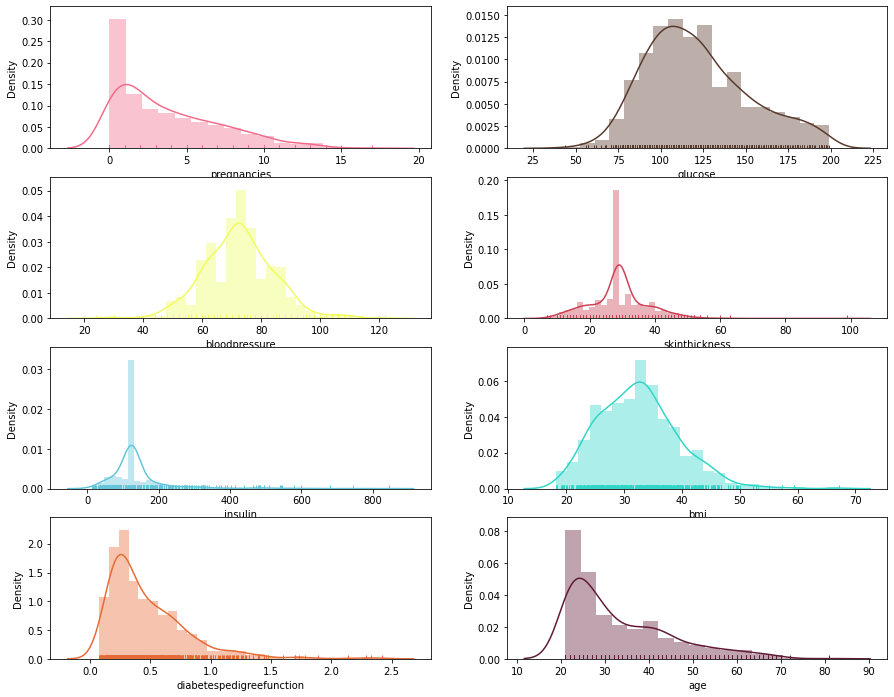

In [38]:
# plotting the distribution of values 
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(diabetic_patients_df['pregnancies'],rug=True,color='#F26B8A',ax=axs[0])
sns.distplot(diabetic_patients_df['glucose'],rug=True,color='#59392B',ax=axs[1])
sns.distplot(diabetic_patients_df['bloodpressure'],rug=True,color='#EFFD5F',ax=axs[2])
sns.distplot(diabetic_patients_df['skinthickness'],rug=True,color='#CB4154',ax=axs[3])
sns.distplot(diabetic_patients_df['insulin'],rug=True,color='#63C5DA',ax=axs[4])
sns.distplot(diabetic_patients_df['bmi'],color='#30D5C8',rug=True,ax=axs[5])
sns.distplot(diabetic_patients_df['diabetespedigreefunction'],color='#E66A35',rug=True,ax=axs[6])
sns.distplot(diabetic_patients_df['age'],rug=True,color='#601A35',ax=axs[7])
plt.show();

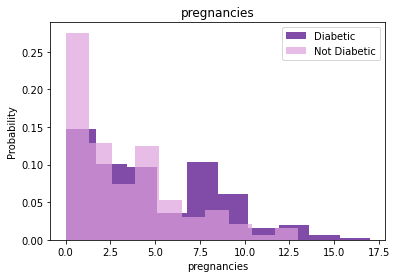

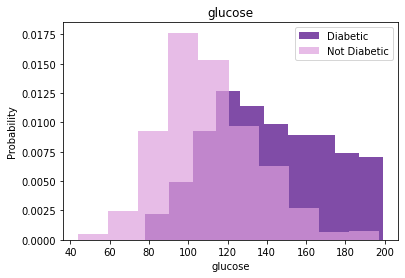

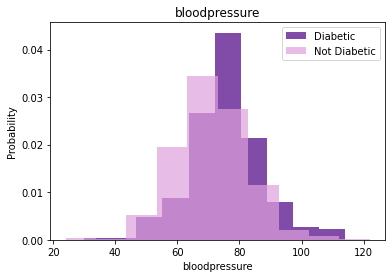

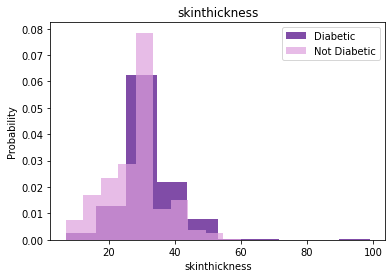

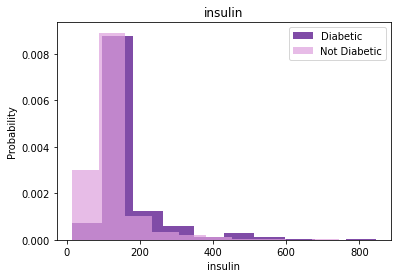

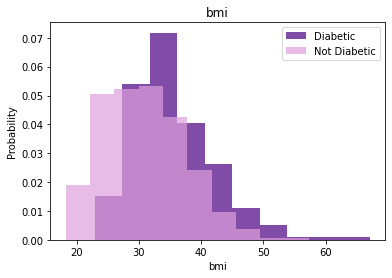

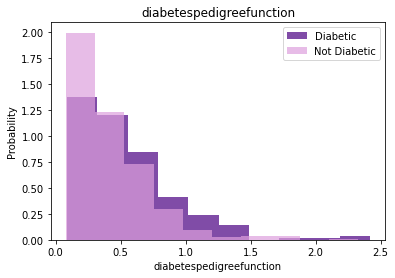

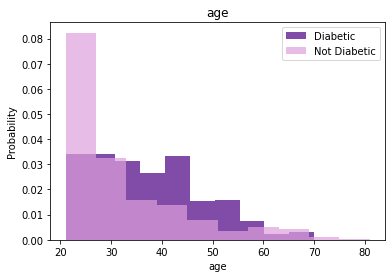

In [41]:
# plot Histogram for features to show relationship between them and target 
for feature in features[:-1]:
  plt.hist(diabetic_patients_df[diabetic_patients_df['outcome']==1][feature], color= 'indigo', alpha = 0.7, label = 'Diabetic', density=True)
  plt.hist(diabetic_patients_df[diabetic_patients_df['outcome']==0][feature], color= 'plum', alpha = 0.7, label = 'Not Diabetic', density=True)
  plt.title(feature)
  plt.ylabel('Probability')
  plt.xlabel(feature)
  plt.legend()
  plt.show()

**Conclusion**


-Patients who are not pregnant seem to have fewer cases of diabetes as compared to those with expectant ones

-Patients with higher glucose levels in their bodies are more likely to have diabetes as compared to ones with less

-Patients with higher bmi are more likely to have diabetes according to the plots

-Patients between ages 30-60 are more likely to be diabetic according to the plots

##Data Modeling

In [42]:
diabetic_patients_df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [43]:
#(Using Decision Trees, Random Forest and Logistic Regression)
#define features and target

#import the necessary functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

features = diabetic_patients_df.drop(['outcome'], axis=1)
target = diabetic_patients_df['outcome']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=142)

# train models
desc_model = DecisionTreeClassifier(random_state=12345)
forest_model = RandomForestClassifier(random_state=12345)
regression_model = LogisticRegression(random_state=12345, solver='liblinear')


desc_model.fit(x_train, y_train)
forest_model.fit(x_train, y_train)
regression_model.fit(x_train, y_train)

# make predictions
desc_test_predictions =desc_model.predict(x_test)
forest_test_predictions =forest_model.predict(x_test)
regression_test_predictions =regression_model.predict(x_test)



##Model Evaluation

In [44]:
# calculate accuracy score
# Checking accuracy of our model
from sklearn.metrics import accuracy_score 
print(f'DecisionTreeClassifier accuracy: {accuracy_score(y_test, desc_test_predictions)}')
print(f'RandomForestClassifier accuracy: {accuracy_score(y_test, forest_test_predictions)}')
print(f'LogisticRegression accuracy: {accuracy_score(y_test, regression_test_predictions)}')

DecisionTreeClassifier accuracy: 0.7291666666666666
RandomForestClassifier accuracy: 0.828125
LogisticRegression accuracy: 0.8385416666666666


In [45]:
from sklearn.metrics import classification_report
# print classification report for DecisionTreeClassifier
print(f'DecisionTreeClassifier classification report:\n {classification_report(y_test, desc_test_predictions)}')


DecisionTreeClassifier classification report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.63      0.59      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



In [46]:

print(f'RandomForestClassifier classification report:\n {classification_report(y_test, forest_test_predictions)}')


RandomForestClassifier classification report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       123
           1       0.81      0.68      0.74        69

    accuracy                           0.83       192
   macro avg       0.82      0.80      0.81       192
weighted avg       0.83      0.83      0.82       192



In [47]:
print(f'LogisticRegression classification report:\n {classification_report(y_test, regression_test_predictions)}')

LogisticRegression classification report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       123
           1       0.84      0.68      0.75        69

    accuracy                           0.84       192
   macro avg       0.84      0.80      0.82       192
weighted avg       0.84      0.84      0.83       192



##Hyparameter Tuning

In [48]:
# Tuning hyperparameters for Decision tree classifier 
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(x_train, y_train)
    predictions_valid = model.predict(x_test)
    print('max_depth =', depth, ': ', end='')
    print(accuracy_score(y_test, predictions_valid))

max_depth = 1 : 0.7395833333333334
max_depth = 2 : 0.7916666666666666
max_depth = 3 : 0.765625
max_depth = 4 : 0.7760416666666666
max_depth = 5 : 0.7552083333333334
max_depth = 6 : 0.7916666666666666
max_depth = 7 : 0.7760416666666666
max_depth = 8 : 0.7135416666666666
max_depth = 9 : 0.7552083333333334
max_depth = 10 : 0.7395833333333334
max_depth = 11 : 0.7291666666666666
max_depth = 12 : 0.75
max_depth = 13 : 0.7395833333333334
max_depth = 14 : 0.7291666666666666
max_depth = 15 : 0.7291666666666666
max_depth = 16 : 0.7291666666666666
max_depth = 17 : 0.7291666666666666
max_depth = 18 : 0.7291666666666666
max_depth = 19 : 0.7291666666666666


Here we see that the best results are obtained at a max depth of 2, however, constant diminishing results are seen from a max depth of 12 where it settles at 0.6875

In [49]:
# best maximum depth is 2
model = DecisionTreeClassifier(random_state=12345, max_depth=2)
model.fit(x_train, y_train)
predictions_valid = model.predict(x_test)
print(accuracy_score(y_test, predictions_valid))

0.7916666666666666


In [50]:
# Tune hyperparameters for RandomForestClassifier()

def get_estimators():
  score = 0
  for estimators in range(1, 81):
      model = RandomForestClassifier(random_state=12345, n_estimators=estimators)
      model.fit(x_train, y_train)
      predictions_valid = model.predict(x_test)
      pred_score = accuracy_score(y_test, predictions_valid)
      if pred_score > score: 
          score = pred_score
  return print('n_estimators =', estimators, 'accuracy: ', score)



In [51]:
# Tune hyperparameters for LogisticRegression
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(x_train, y_train)
predictions_valid = model.predict(x_test)
print(f'accuracy score is: {accuracy_score(y_test, predictions_valid)}')

accuracy score is: 0.8385416666666666


In [52]:
# Tune hyperparameters for LogisticRegression
model = LogisticRegression(random_state=12345, solver='liblinear', C = 10)
model.fit(x_train, y_train)
predictions_valid = model.predict(x_test)
print(f'accuracy score is: {accuracy_score(y_test, predictions_valid)}')
coef = model.coef_[0]
print(coef)
print(features)

accuracy score is: 0.8541666666666666
[ 0.12911322  0.03218386 -0.00384911  0.00159327 -0.00076485  0.07445108
  0.74104137  0.00734293]
     pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0         

In [53]:
# Tune hyperparameters for LogisticRegression
model = LogisticRegression(random_state=12345, solver='newton-cg')
model.fit(x_train, y_train)
predictions_valid = model.predict(x_test)
print(f'accuracy score is: {accuracy_score(y_test, predictions_valid)}')
coef = model.coef_[0]
print(coef)
print(features)

accuracy score is: 0.859375
[ 1.29034925e-01  3.34485250e-02 -4.44645396e-04  2.56603240e-03
 -7.45216059e-04  7.97124561e-02  7.03260773e-01  8.55438104e-03]
     pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0  

In [ ]:
# Tune hyperparameters for LogisticRegression
# You don't need to tune the hyperparameters of logistic regression. Just train it.
model = LogisticRegression(random_state=12345, solver='newton-cg', C=10)
model.fit(x_train, y_train)
predictions_valid = model.predict(x_test)
print(f'accuracy score is: {accuracy_score(y_test, predictions_valid)}')
coef = model.coef_[0]
print(coef)
print(features)

accuracy score is: 0.859375
[ 1.29788694e-01  3.34791372e-02 -4.68943048e-04  2.46774292e-03
 -7.65075793e-04  7.97490990e-02  7.72128170e-01  8.48198399e-03]
     pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0  

##Findings and Recommendations

We were able to get an accuracy score better than 85 through logistic regression by altering the solver and the C parameter. 

In the data cleaning phase, there were some values which had a value of zero which did not seem to be consistent with the data. These values were impuded with the mean or the median, depending on the skewness and how other data related to the values.

When using Randomforrest classifier, the top three features considered by the algorithm were:
1. diabetes degree function - 7.72128170e-01,
2. pregnancies - 1.29788694e-01,
3. bmi - 7.97490990e-02 
4. glucose - 3.34791372e-02

When using logistic regression (liblinear), the top three features considered by the algorithm were:
1. diabetes degree function - 0.74104137,
2. pregnancies - 0.12911322,
3. bmi -  0.07445108 
4. glucose -   0.03218386

When using logistic regression (newton -cg), the top three features considered by the algorithm were:
1. diabetes degree function - 7.03260773e-01
2. pregnancies - 1.29034925e-01
3. bmi -  7.97124561e-02
4. glucose -   3.34485250e-02

Using the above three prediction techniques, we can deduce that factors which are highly influential in predicting the presence of diabetes are:
1. diabetes degree function
2. pregnancies
3. bmi
4. glucose

In this dataset, Logistic regression using newton-cg solver gave us the highest accuracy of 0.8593